In [19]:
import matplotlib.pyplot as plt
from imdb import IMDb

In [20]:
# creates an instance of the IMDb class from the IMDbPY library.
ia = IMDb()

In [21]:
def plot_movie_ratings(movie_titles):
    for title in movie_titles:
        movies = ia.search_movie(title)
        if movies:
            movie = movies[0]  # Selecting the first movie from search results
            ia.update(movie)
            rating = movie.get('rating')
            if rating:
                plt.bar(title, rating, color='blue')
            else:
                print(f"No rating found for {title}")
        else:
            print(f"No movie found with title: {title}")
            
    plt.xlabel('Movie Title')
    plt.ylabel('Rating')
    plt.title('Movie Ratings')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    

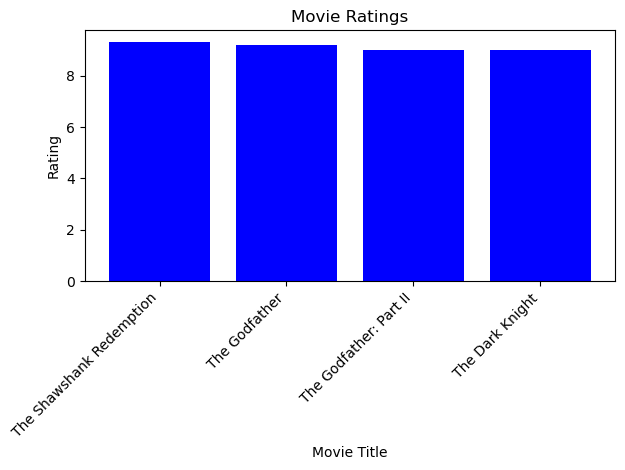

In [22]:
movies_to_plot = [
    "The Shawshank Redemption",
    "The Godfather",
    "The Godfather: Part II",
    "The Dark Knight",
]

plot_movie_ratings(movies_to_plot)

In [23]:
#Get top 250 movies IMDb rating
import requests
from bs4 import BeautifulSoup
import csv

def get_movies():
    # IMDb URL
    url = f"https://www.imdb.com/chart/top/?ref_=nv_mv_250"

    # Define headers
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
    }

    # Send a GET request to the IMDb URL with headers
    response = requests.get(url, headers=headers)
    
    #print(response)

    # Check if the request was successful
    if response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Find all movie titles on the page
        movie_titles = soup.find_all('div', class_='ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-be6f1408-9 srahg cli-title')
        #print(movie_titles)
        
        # Extract movie titles from the HTML elements
        movie_list = [title.find('a').text for title in movie_titles]
        #print(movie_list)
        
        return movie_list
    else:
        print(f"Failed to fetch data from IMDb. Status code: {response.status_code}")
        print(response.text)  # Print HTML content for debugging
        return []

def get_rating():
    # IMDb URL
    url = f"https://www.imdb.com/chart/top/?ref_=nv_mv_250"

    # Define headers
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
    }

    # Send a GET request to the IMDb URL with headers
    response = requests.get(url, headers=headers)
    
    #print(response)

    # Check if the request was successful
    if response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.content, 'html.parser')
        
        movie_rating=soup.find_all('span',class_='ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating')
        #print(movie_rating)
        
        rating_list = [rating.text.strip()[:3] for rating in movie_rating]
        
        #print(rating_list)
        
        return rating_list
    else:
        print(f"Failed to fetch data from IMDb. Status code: {response.status_code}")
        print(response.text)  # Print HTML content for debugging
        return []

movies = get_movies()
ratings = get_rating()

if movies and ratings:
    with open('top_250_movies.csv', mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(['Movie', 'IMDb Rating'])  # Write header
        for movie, rating in zip(movies, ratings):
            writer.writerow([movie, rating])
    print("Data written to 'top_250_movies.csv' successfully!")
else:
    print("No movies found or ratings unavailable.")

No movies found or ratings unavailable.


In [24]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('top_250_movies.csv')

# Print the DataFrame
print(df.head(10))

                                               Movie  IMDb Rating
0                        1. The Shawshank Redemption          9.3
1                                   2. The Godfather          9.2
2                                 3. The Dark Knight          9.0
3                           4. The Godfather Part II          9.0
4                                    5. 12 Angry Men          9.0
5                                6. Schindler's List          9.0
6   7. The Lord of the Rings: The Return of the King          9.0
7                                    8. Pulp Fiction          8.9
8  9. The Lord of the Rings: The Fellowship of th...          8.9
9                 10. The Good, the Bad and the Ugly          8.8


In [25]:
#Get movie detail by input name
def get_movie_details(movie_title):
    # Initialize IMDb object
    ia = IMDb()

    # Search for the movie title
    search_results = ia.search_movie(movie_title)

    if search_results:
        # Get the first search result (the most relevant)
        movie = search_results[0]

        # Fetch full details for the movie
        ia.update(movie)

        # Print movie details
        print("Title:", movie.get('title', 'None'))
        print("Year:", movie.get('year', 'None'))
        print("Genres:", ', '.join(movie.get('genres', ['None'])))
        print("Plot:", movie.get('plot outline', 'None'))
        print("Rating:", movie.get('rating', 'None'))
        print("Directors:", ', '.join([director.get('name', 'None') for director in movie.get('directors', [])]))
        print("Cast:")
        for actor in movie.get('cast', [])[:10]:
            print(actor.get('name', 'None'))
    else:
        print("Movie not found.")

# Input the movie title
movie_title = input("Enter the movie title: ")

# Call the function to get movie details
get_movie_details(movie_title)



Title: Your Name.
Year: 2016
Genres: Animation, Drama, Fantasy, Romance
Plot: Mitsuha is the daughter of the mayor of a small mountain town. She's a straightforward high school girl who lives with her sister and her grandmother and has no qualms about letting it be known that she's uninterested in Shinto rituals or helping her father's electoral campaign. Instead she dreams of leaving the boring town and trying her luck in Tokyo. Taki is a high school boy in Tokyo who works part-time in an Italian restaurant and aspires to become an architect or an artist. Every night he has a strange dream where he becomes...a high school girl in a small mountain town.
Rating: 8.4
Directors: Makoto Shinkai
Cast:
Ryunosuke Kamiki
Mone Kamishiraishi
Ryo Narita
Aoi Yûki
Nobunaga Shimazaki
Kaito Ishikawa
Kanon Tani
Masaki Terasoma
Sayaka Ôhara
Kazuhiko Inoue


In [26]:
#Get top 50 movies released by year
import requests
from bs4 import BeautifulSoup

def get_movies_by_year(year):
    # IMDb URL for movies released in the specified year
    url = f"https://www.imdb.com/search/title/?title_type=feature&release_date=,{year}-12-31"

    # Define headers
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
    }

    # Send a GET request to the IMDb URL with headers
    response = requests.get(url, headers=headers)
    
    print(response)

    # Check if the request was successful
    if response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Find all movie titles on the page
        movie_titles = soup.find_all('div', class_='ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-be6f1408-9 srahg dli-title')
        #print(movie_titles)
        
        # Extract movie titles from the HTML elements
        movie_list = [title.find('a').text for title in movie_titles]
        #print(movie_list)

        return movie_list
    else:
        print(f"Failed to fetch data from IMDb. Status code: {response.status_code}")
        print(response.text)  # Print HTML content for debugging
        return []

# Input the year
year_input = int(input("Enter the year: "))

# Get the list of movies released in the input year
movies = get_movies_by_year(year_input)

if movies:
    print(f"Top 50 movies released in {year_input} (Sort by popularity):")
    for i, movie in enumerate(movies, start=1):
        print(f"{movie}")
else:
    print(f"No movies found for the year {year_input}.")


<Response [200]>
No movies found for the year 2021.


In [18]:
print(df['Movie'].head(10))

0                          1. The Shawshank Redemption
1                                     2. The Godfather
2                                   3. The Dark Knight
3                             4. The Godfather Part II
4                                      5. 12 Angry Men
5                                  6. Schindler's List
6     7. The Lord of the Rings: The Return of the King
7                                      8. Pulp Fiction
8    9. The Lord of the Rings: The Fellowship of th...
9                   10. The Good, the Bad and the Ugly
Name: Movie, dtype: object
